In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [125]:
df = pd.read_csv('../Dataset/full.csv', encoding='utf-8', index_col='id') # valha, pq usei \ no lugar de / no outro notebook? o.O

In [9]:
df.head(1)

,nome,uf,municipio,dependencia_administrativa,localizacao,n_alunos_censo,porte,n_alunos_participantes_enem,taxa_participacao,n_participantes_necessidades_especiais,...,pct_alunos_nivel_3_RED,pct_alunos_nivel_4_RED,pct_alunos_nivel_5_RED,media_30_melhores_LC,media_LC,pct_alunos_nivel_1_LC,pct_alunos_nivel_2_LC,pct_alunos_nivel_3_LC,pct_alunos_nivel_4_LC,pct_alunos_nivel_5_LC
id,,,,,,,,,,,,,,,,,,,,,
12018422,ESC SANTA LUCIA III,AC,ACRELANDIA,Estadual,Rural,19,De 1 a 30 alunos,11,57.894737,0,...,0,0,0,NaN,447.936364,45.454545,45.454545,9.090909,0,0


In [104]:
df.indicador_nivel_socioeconomico.unique()

array([u'M\xe9dio Baixo', u'M\xe9dio', u'Sem informa\xe7\xe3o', u'Baixo',
       u'Muito Alto', u'M\xe9dio Alto', u'Alto', u'Muito Baixo'], dtype=object)

In [126]:
df['indicador_nivel_socioeconomico'] = df.indicador_nivel_socioeconomico.astype('category', \
categories=[u'Sem informa\xe7\xe3o', u'Muito Baixo', u'Baixo', u'M\xe9dio Baixo', u'M\xe9dio', u'M\xe9dio Alto', 
 u'Alto', u'Muito Alto'], ordered=True)

In [10]:
df.columns[:10]

Index([                                  u'nome',
                                           u'uf',
                                    u'municipio',
                   u'dependencia_administrativa',
                                  u'localizacao',
                               u'n_alunos_censo',
                                        u'porte',
                  u'n_alunos_participantes_enem',
                            u'taxa_participacao',
       u'n_participantes_necessidades_especiais'],
      dtype='object')

In [11]:
df.columns[10:20]

Index([    u'indicador_permanencia_escola',
         u'indicador_nivel_socioeconomico',
       u'faixa_indicador_formacao_docente',
             u'indicador_formacao_docente',
                         u'taxa_aprovacao',
                        u'taxa_reprovacao',
                          u'taxa_abandono',
                   u'media_30_melhores_CH',
                               u'media_CH',
                  u'pct_alunos_nivel_1_CH'],
      dtype='object')

In [13]:
df.columns[20:30]

Index([ u'pct_alunos_nivel_2_CH',  u'pct_alunos_nivel_3_CH',
        u'pct_alunos_nivel_4_CH',  u'pct_alunos_nivel_5_CH',
        u'media_30_melhores_MAT',              u'media_MAT',
       u'pct_alunos_nivel_1_MAT', u'pct_alunos_nivel_2_MAT',
       u'pct_alunos_nivel_3_MAT', u'pct_alunos_nivel_4_MAT'],
      dtype='object')

In [14]:
df.columns[30:40]

Index([u'pct_alunos_nivel_5_MAT',   u'media_30_melhores_CN',
                     u'media_CN',  u'pct_alunos_nivel_1_CN',
        u'pct_alunos_nivel_2_CN',  u'pct_alunos_nivel_3_CN',
        u'pct_alunos_nivel_4_CN',  u'pct_alunos_nivel_5_CN',
        u'media_30_melhores_RED',              u'media_RED'],
      dtype='object')

In [15]:
df.columns[40:50]

Index([u'pct_alunos_nivel_1_RED', u'pct_alunos_nivel_2_RED',
       u'pct_alunos_nivel_3_RED', u'pct_alunos_nivel_4_RED',
       u'pct_alunos_nivel_5_RED',   u'media_30_melhores_LC',
                     u'media_LC',  u'pct_alunos_nivel_1_LC',
        u'pct_alunos_nivel_2_LC',  u'pct_alunos_nivel_3_LC'],
      dtype='object')

In [16]:
df.columns[50:]

Index([u'pct_alunos_nivel_4_LC', u'pct_alunos_nivel_5_LC'], dtype='object')

# uf

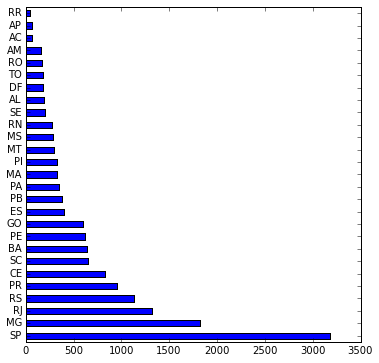

In [17]:
df.uf.value_counts().plot(kind='barh', figsize=(6, 6)) # qtd escolas

# municipio

# dependencia_administrativa

# localizacao

# n_alunos_censo

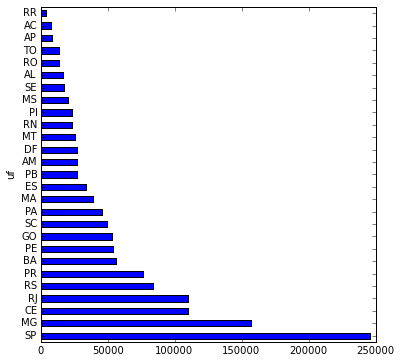

In [23]:
df.groupby('uf').n_alunos_censo.sum().order(ascending=False).plot(kind='barh', figsize=(6, 6)) # por uf

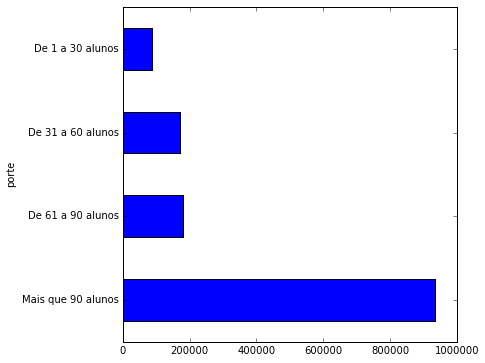

In [24]:
df.groupby('porte').n_alunos_censo.sum().order(ascending=False).plot(kind='barh', figsize=(6, 6)) # por porte

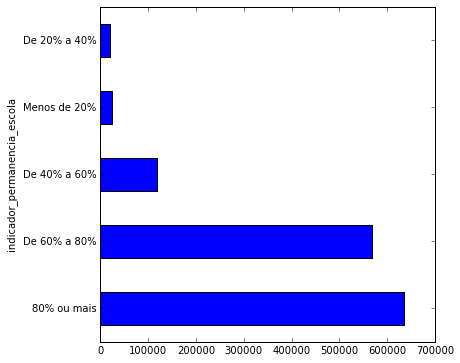

In [27]:
df.groupby(u'indicador_permanencia_escola').n_alunos_censo.sum().order(ascending=False).plot(kind='barh', figsize=(6, 6)) # por porte

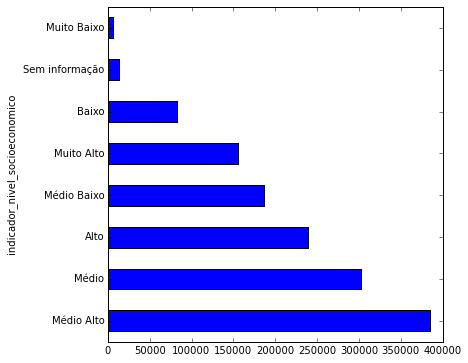

In [28]:
df.groupby(u'indicador_nivel_socioeconomico').n_alunos_censo.sum().order(ascending=False).plot(kind='barh', figsize=(6, 6)) # por porte

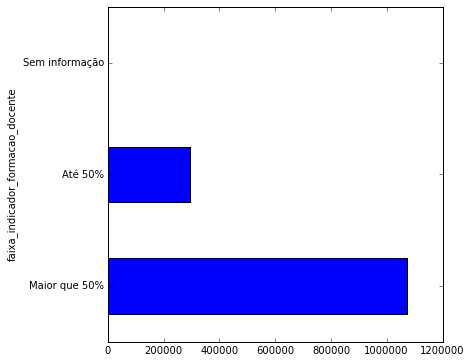

In [29]:
df.groupby(u'faixa_indicador_formacao_docente').n_alunos_censo.sum().order(ascending=False).plot(kind='barh', figsize=(6, 6)) # por porte

# porte

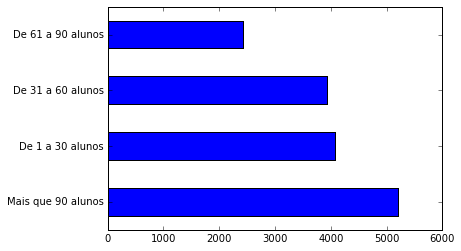

In [32]:
df.porte.value_counts().plot(kind='barh')

### em termos absolutos

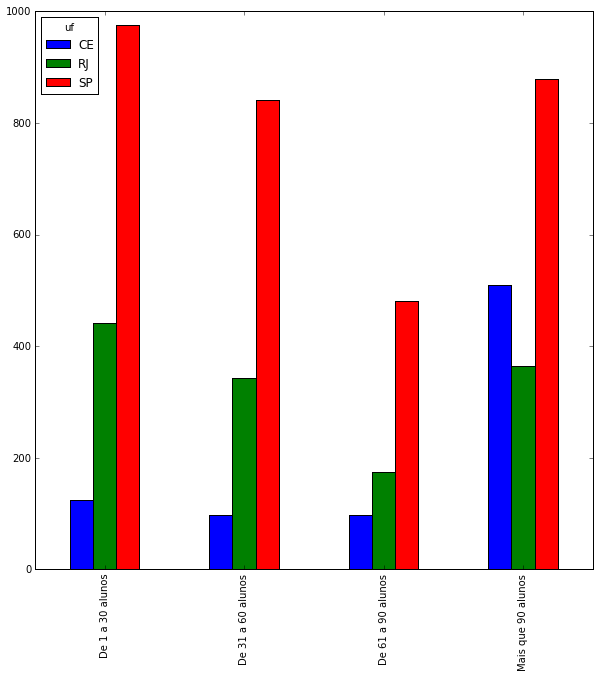

In [41]:
df[df.uf.isin(['CE', 'SP', 'RJ'])].groupby('uf').porte.value_counts().unstack('uf').plot(kind='bar', figsize=(10, 10))

### proporção por porte

In [70]:
df.groupby(['uf', 'porte']).size().unstack('porte').apply(lambda x: x / x.sum(), axis=1)

porte,De 1 a 30 alunos,De 31 a 60 alunos,De 61 a 90 alunos,Mais que 90 alunos
uf,,,,
AC,0.147059,0.264706,0.205882,0.382353
AL,0.236842,0.294737,0.184211,0.284211
AM,0.098765,0.141975,0.154321,0.604938
AP,0.092308,0.153846,0.215385,0.538462
BA,0.305296,0.235202,0.140187,0.319315
CE,0.149578,0.118215,0.118215,0.613993
DF,0.174863,0.153005,0.131148,0.540984
ES,0.268844,0.213568,0.165829,0.351759
GO,0.258278,0.256623,0.153974,0.331126


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019BD7FD0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001B9BF358>], dtype=object)

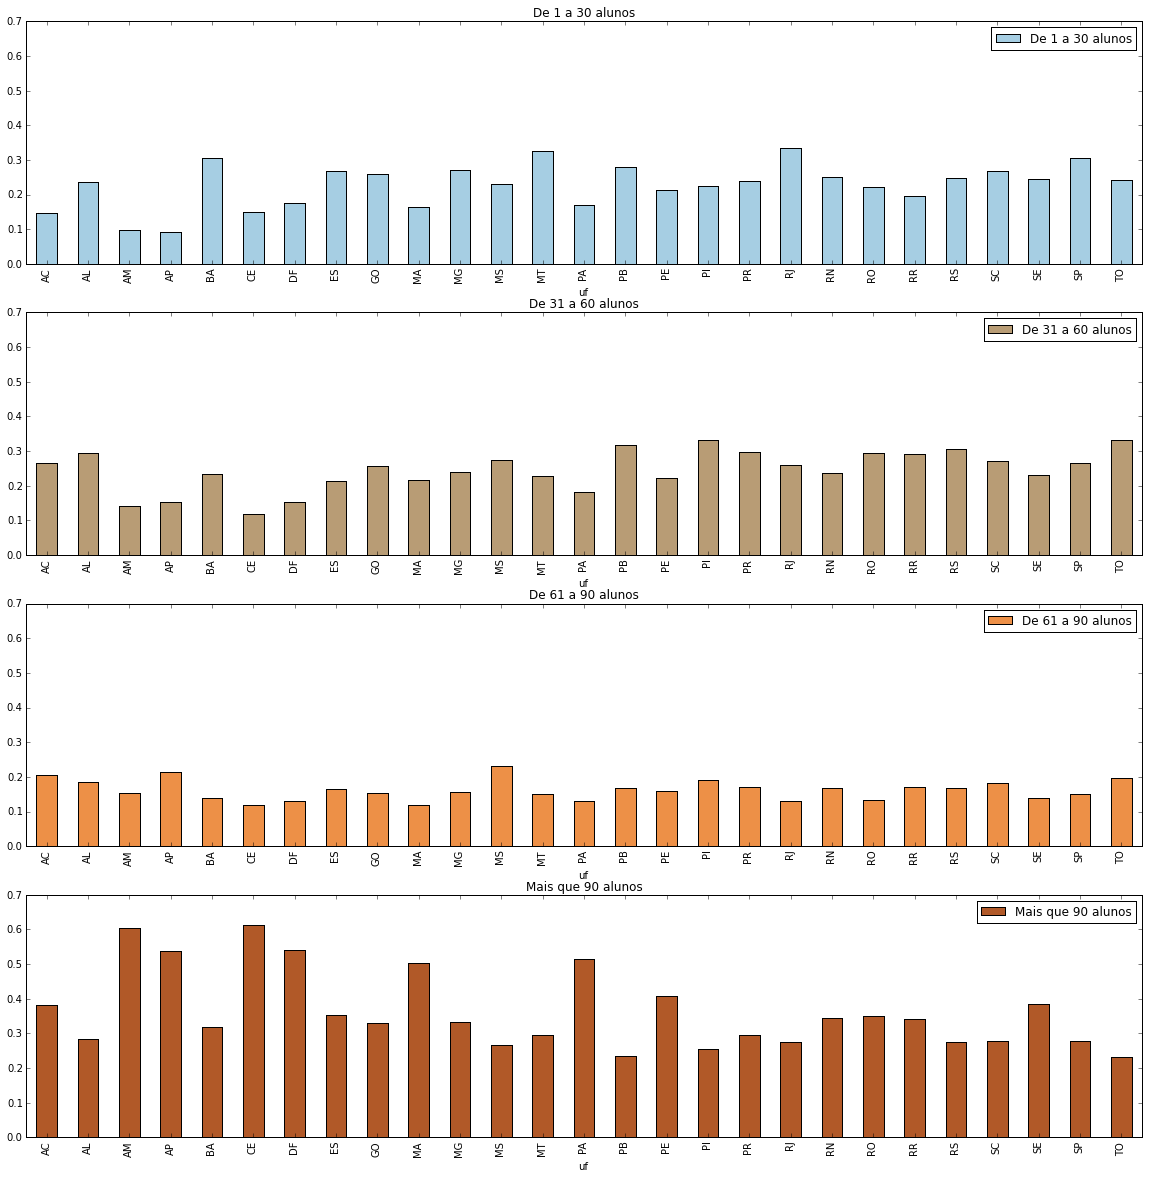

In [76]:
df.groupby(['uf', 'porte']).size().unstack('porte').apply(lambda x: x / x.sum(), axis=1)\
.plot(kind='bar', figsize=(20, 20), colormap='Paired', subplots=True, sharex=False, sharey=True)

In [73]:
uf_regiao = {
    'RO': 'NORTE',
    'AC': 'NORTE',
    'AM': 'NORTE',
    'RR': 'NORTE',
    'PA': 'NORTE',
    'AP': 'NORTE',
    'TO': 'NORTE',
    'MA': 'NORDESTE',
    'PI': 'NORDESTE',
    'CE': 'NORDESTE',
    'RN': 'NORDESTE',
    'PB': 'NORDESTE',
    'PE': 'NORDESTE',
    'AL': 'NORDESTE',
    'SE': 'NORDESTE',
    'BA': 'NORDESTE',
    'MG': 'SUDESTE',
    'ES': 'SUDESTE',
    'RJ': 'SUDESTE',
    'SP': 'SUDESTE',
    'PR': 'SUL',
    'SC': 'SUL',
    'RS': 'SUL',
    'MS': 'CENTRO_OESTE',
    'MT': 'CENTRO_OESTE',
    'GO': 'CENTRO_OESTE',
    'DF': 'CENTRO_OESTE'
    
}

In [132]:
df['regiao'] = df.uf.apply(lambda x: uf_regiao[x])\
.astype('category', categories=['NORTE', 'NORDESTE','CENTRO_OESTE', 'SUDESTE', 'SUL'], ordered=True)

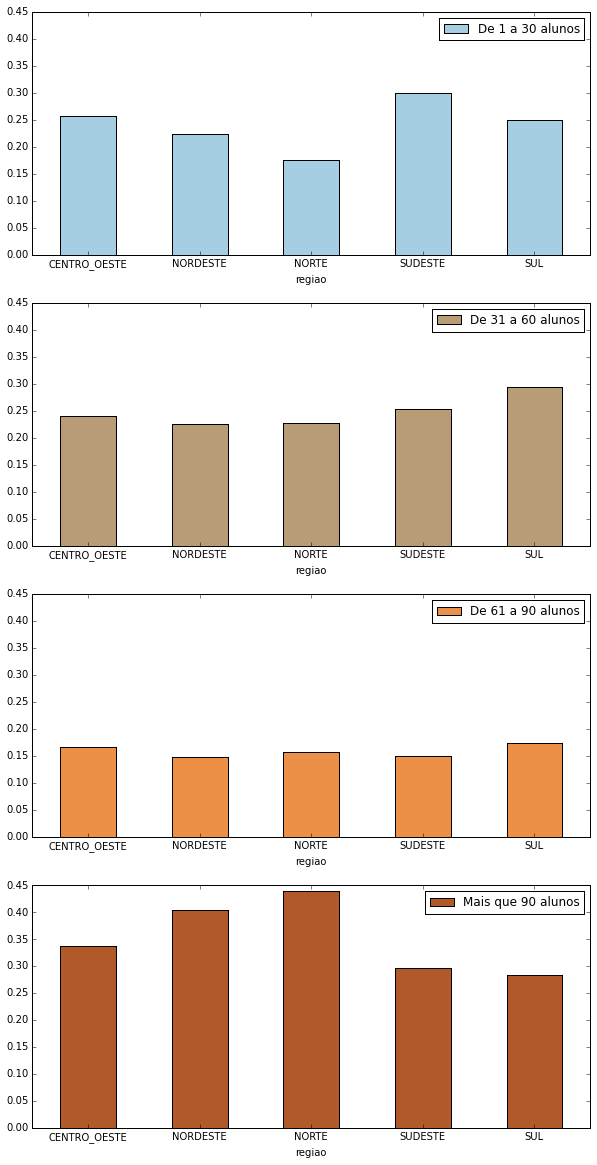

In [103]:
axs = df.groupby(['regiao', 'porte']).size().unstack('porte').apply(lambda x: x / x.sum(), axis=1)\
.plot(kind='bar', figsize=(10, 20), colormap='Paired', subplots=True, sharex=False, sharey=True, rot=0)
for ax in axs:
    
    ax.set_title('')

In [97]:
df.groupby(['regiao', 'indicador_nivel_socioeconomico']).size().unstack('indicador_nivel_socioeconomico')\

indicador_nivel_socioeconomico,Alto,Baixo,Muito Alto,Muito Baixo,Médio,Médio Alto,Médio Baixo,Sem informação
regiao,,,,,,,,
CENTRO_OESTE,258,4,166,NaN,464,366,80,29
NORDESTE,437,599,176,59,797,594,1010,113
NORTE,107,62,83,3,337,148,259,32
SUDESTE,1862,48,1624,3,1047,1692,280,167
SUL,734,2,492,NaN,354,1090,27,35


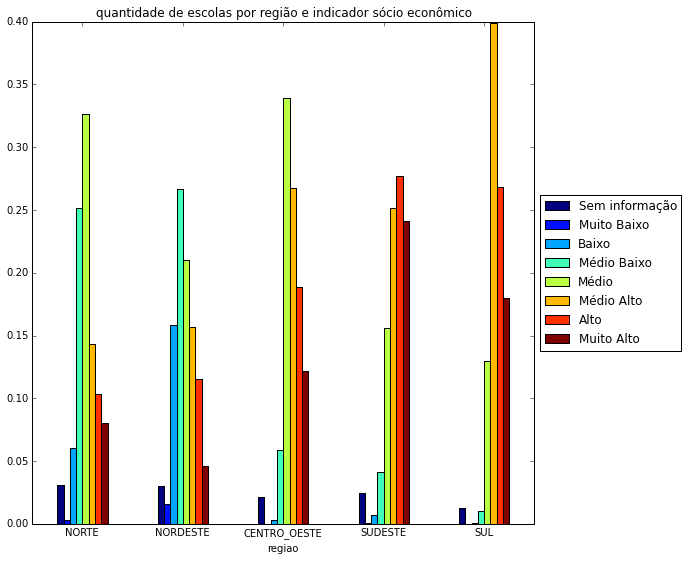

In [136]:
ax = df.groupby(['regiao', 'indicador_nivel_socioeconomico']).size().unstack('indicador_nivel_socioeconomico').fillna(0)\
.apply(lambda x: x / x.sum(), axis=1)\
.plot(kind='bar', figsize=(9, 9), colormap='jet', sharex=False, sharey=True, rot=0)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title(u"quantidade de escolas por região e indicador sócio econômico")